#  Import yfinance Library and Download Microsoft stock price data set

In [1]:
# ! pip install yfinance
import yfinance as yf
#msft = yf.Ticker("MSFT")

In [2]:
import yfinance as yf
msft = yf.Ticker("MSFT")
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [3]:
# Dowload data of MSFT from 1, Januray 2018 to current date
data = yf.download("MSFT", start="2018-01-01", end="2022-04-11")

[*********************100%***********************]  1 of 1 completed


# 2. Data Visualisation

In [4]:
# I observed that data updated here is till 8th April 2022.
data

# We can see here,head and tail together for this Dataframe.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,81.530228,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,81.909660,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,82.630577,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,83.655029,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,83.740417,22113000
...,...,...,...,...,...,...
2022-04-04,310.089996,315.109985,309.709991,314.970001,314.970001,24289600
2022-04-05,313.269989,314.869995,309.869995,310.880005,310.880005,23156700
2022-04-06,305.190002,307.000000,296.709991,299.500000,299.500000,40110400


In [5]:
# Although it provide trivial information but I did it.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1.076000e+03
mean,183.107426,184.929015,181.162881,183.154768,180.248293,3.044240e+07
std,75.262021,75.949319,74.515088,75.288179,76.460302,1.328267e+07
min,86.059998,86.309998,83.830002,85.010002,80.638573,8.989200e+06
25%,111.677500,112.382500,110.782503,111.750000,107.619738,2.216345e+07
50%,163.584999,166.000000,162.279999,164.000000,161.038467,2.699105e+07
75%,240.002506,243.232498,238.622505,241.230000,239.143059,3.463770e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.112421e+08


In [6]:
# Lets check if there is any Null value to Impute
data.isnull().values.any()

False

So,I have recorded data with no Null values for last 1076 days available and I can see that there are only 6 columns in data and one time stamp column for date.
Opening Price ,Highest Price,Lowest Price,Closing Price,Volume and Adjusted Price of a particular date is available in Data.  

In [7]:
# Plot Histograms
#for i in data.columns.values:
    #plt.hist(data[i])
    #plt.xlabel(i)
    #plt.show()   

<AxesSubplot:xlabel='Date'>

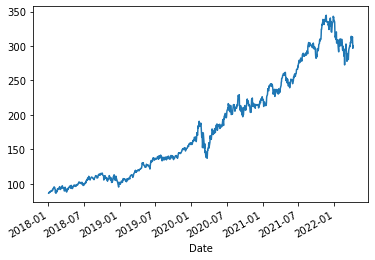

In [8]:
# Lets Plot features with Date
data['Open'].plot()

<AxesSubplot:xlabel='Date'>

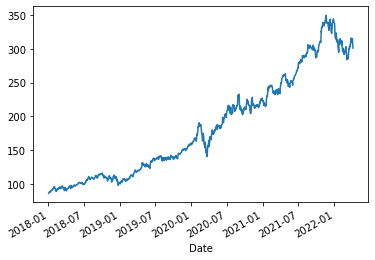

In [9]:
data['High'].plot()

<AxesSubplot:xlabel='Date'>

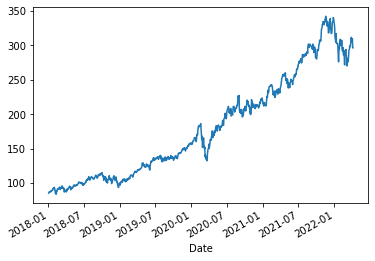

In [10]:
data['Low'].plot()

<AxesSubplot:xlabel='Date'>

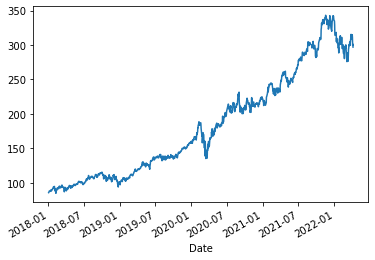

In [11]:
data['Close'].plot()

<AxesSubplot:xlabel='Date'>

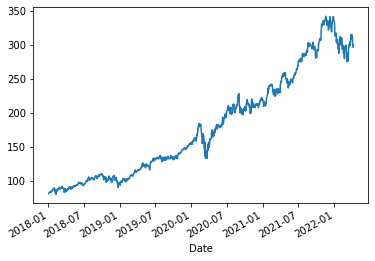

In [12]:
data['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

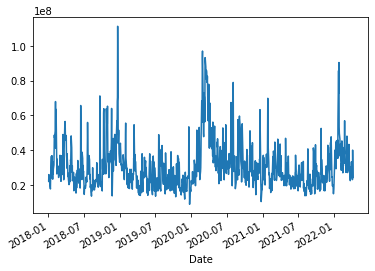

In [13]:
data['Volume'].plot()

Roughly, we can say that all prices are strictly increasing after some time but Volume is fluctuating in nature.
Although I had such intuition that Volume will rise as share price fall and vice-versa.

# 3. Data Pre Processing

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

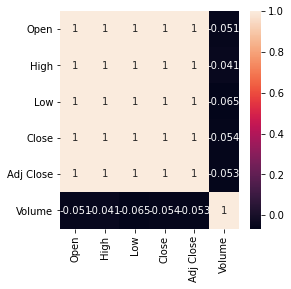

In [15]:
# Lets check for correlation between pair of peatures.
# This code snippet visualise 2D cross-correlation matrix(Heat Map).
import seaborn as sns
fig, az =plt.subplots(figsize=(4,4))
sns.heatmap(data.corr(),annot=True)
plt.show()

As We can observe from above cross-correlation matrix that all prices strongly correlate but Volume feature has negative and near to zero correlation with all features.

Our Target Varible is Adjusted Close Price that is the closing price after adjustments of all dividend distributions.

In [16]:
# Target column ie Adjusted Close Price
target = pd.DataFrame(data['Adj Close'])
target

,Adj Close
Date,
2018-01-02,81.530228
2018-01-03,81.909660
2018-01-04,82.630577
2018-01-05,83.655029
2018-01-08,83.740417
...,...
2022-04-04,314.970001
2022-04-05,310.880005
2022-04-06,299.500000


In [17]:
features= ['Open', 'High', 'Low', 'Close','Volume']

In [18]:
# Now we will scale this data using sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaled_data_numpy = scaler.fit_transform(data[features])
scaled_data = pd.DataFrame(columns=features, data=scaled_data_numpy, index=data.index)
scaled_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,0.000271,0.000000,0.006464,0.003642,0.131973
2018-01-03,0.000000,0.000759,0.008283,0.005192,0.166961
2018-01-04,0.002050,0.005126,0.010605,0.008136,0.126381
2018-01-05,0.006188,0.007974,0.013933,0.012321,0.141002
2018-01-08,0.008277,0.008619,0.014591,0.012669,0.128346
...,...,...,...,...,...
2022-04-04,0.866453,0.868773,0.874250,0.890973,0.149633
2022-04-05,0.878752,0.867861,0.874869,0.875126,0.138554
2022-04-06,0.847502,0.837978,0.823935,0.831035,0.304355


# We will shift target array by one as our aim is to predict next day value.

In [19]:
target=target.shift(-1)   # Target Value is nothing but Adjusted Closing Price

In [20]:
target
# Now we can say that we have next day value at corresponding date and NaN at 8th of april.

,Adj Close
Date,
2018-01-02,81.909660
2018-01-03,82.630577
2018-01-04,83.655029
2018-01-05,83.740417
2018-01-08,83.683502
...,...
2022-04-04,310.880005
2022-04-05,299.500000
2022-04-06,301.369995


#  Time Series Split using Sklearn

In [21]:
from sklearn.model_selection import TimeSeriesSplit
# Time Series cross-validator
# It provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.
tscv=TimeSeriesSplit(n_splits=10)

# tscv.split(data) return the list of lists having index of Traing data points and testing data points.

In [22]:
'''a=tscv.split(scaled_data)
for i,j in a:
    print(i,j)'''

'a=tscv.split(scaled_data)\nfor i,j in a:\n    print(i,j)'

In [23]:
# Now lets seperate TrainX,TrainY,TestX,TestY
for  i,j in tscv.split(scaled_data):
    l1,l2=len(i),len(j)               # i and j are lists of indices for training and testing data points.
    trainX,testX=scaled_data[:l1],scaled_data[l1:l1+l2]
    trainY,testY=target[:l1],target[l1:l1+l2]

In [24]:
# Lets Check if total number of points are still 1076 or not
testY.shape[0] + trainY.shape[0] == 1076

True

# Create a LSTM model and train over given test data.

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.layers import LSTM
from tensorflow.keras.optimizers import *

In [26]:
# Convert dataframe to numpy array
trainX =np.array(trainX)
testX =np.array(testX)

# Resizing Numpy array for LSTM Input ie 3D
trainXt = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testXt= testX.reshape(testX.shape[0], 1, testX.shape[1])

In [27]:
predictor=Sequential()
predictor.add(LSTM(16, input_shape=(1, trainX.shape[1]), activation='relu'))
predictor.add(Dense(1))
predictor.compile('adam','mse','accuracy')
predictor.fit(trainXt,trainY,epochs=1000,batch_size=8)

Epoch 1/1000
123/123 [==============================] - 1s 787us/step - loss: 32553.8359 - accuracy: 0.0000e+00
Epoch 2/1000
123/123 [==============================] - 0s 787us/step - loss: 32166.2812 - accuracy: 0.0000e+00
Epoch 3/1000
123/123 [==============================] - 0s 865us/step - loss: 31237.1934 - accuracy: 0.0000e+00
Epoch 4/1000
123/123 [==============================] - 0s 844us/step - loss: 29677.9590 - accuracy: 0.0000e+00
Epoch 5/1000
123/123 [==============================] - 0s 811us/step - loss: 27667.9355 - accuracy: 0.0000e+00
Epoch 6/1000
123/123 [==============================] - 0s 811us/step - loss: 25372.1230 - accuracy: 0.0000e+00
Epoch 7/1000
123/123 [==============================] - 0s 943us/step - loss: 22910.9883 - accuracy: 0.0000e+00
Epoch 8/1000
123/123 [==============================] - 0s 801us/step - loss: 20387.6172 - accuracy: 0.0000e+00
Epoch 9/1000
123/123 [==============================] - 0s 803us/step - loss: 17872.3145 - accuracy: 0.0

# Perform Prediction and Check R2 Score 

In [28]:
predYtrain=predictor.predict(trainXt)
predYtest=predictor.predict(testXt[:-1])  # Predict till second last date as we have lost last index of target variable

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
trainScore =r2_score(trainY, predYtrain)
print("R2 score for training dataset is:\t{:0.3f}".format(trainScore))

testScore = r2_score(testY[:-1], predYtest)
print("R2 score for test dataset is:\t{:0.3f}".format(testScore))

R2 score for training dataset is:	0.998
R2 score for test dataset is:	0.868


In [30]:
#msq = mean_squared_error(testY[:-1], predYtest)
#print("Mean Square Error for unseen data points is:\t{:0.3f}".format(msq))

In [31]:
len(testY[:-1])

96

In [32]:
len(predYtest)

96

In [33]:
# This is Ground truth for last 96 days Adj Close price of MSFT
testY[:-1]

,Adj Close
Date,
2021-11-19,339.128754
2021-11-22,336.983215
2021-11-23,337.212738
2021-11-24,328.999725
2021-11-26,335.935394
...,...
2022-04-01,314.970001
2022-04-04,310.880005
2022-04-05,299.500000


In [34]:
# This is predicted Ads Close price for last 96 days of MSFT.
predYtest

array([[344.05316],
       [343.76343],
       [337.59125],
       [337.26447],
       [332.60388],
       [337.11713],
       [333.35806],
       [333.60437],
       [330.71567],
       [326.00623],
       [324.69513],
       [333.93018],
       [334.6308 ],
       [334.47308],
       [340.1107 ],
       [341.3636 ],
       [330.13953],
       [331.65533],
       [329.6084 ],
       [322.30417],
       [320.36908],
       [325.1467 ],
       [331.028  ],
       [334.85056],
       [340.11038],
       [342.63852],
       [342.50592],
       [341.2192 ],
       [337.92557],
       [334.9311 ],
       [331.2688 ],
       [320.59814],
       [314.60464],
       [313.84735],
       [311.2608 ],
       [313.98376],
       [319.8182 ],
       [311.31784],
       [307.8178 ],
       [304.51633],
       [306.4126 ],
       [305.2567 ],
       [299.04797],
       [290.29697],
       [289.5995 ],
       [300.58533],
       [301.7195 ],
       [303.38657],
       [309.98734],
       [308.69556],


In [35]:
#predictor.summary()

# Conclusion:

So finally, I have got R2 score of 0.868 for unseen data which is quite good but R2 score close to 1 is considered as best.
I can try dropping features and add dropout to improve R2 score. 

# Let's Check for Correlation of Microsoft stock price (Adjusted Close Price) with Apple, Tesla and Amazon.

In [36]:
microsoft=yf.download("MSFT", start="2018-01-01", end="2022-04-11")
msft=microsoft["Adj Close"]
apple=yf.download("AAPL", start="2018-01-01", end="2022-04-11")
aple=apple["Adj Close"]
tesla=yf.download("TSLA", start="2018-01-01", end="2022-04-11")
tsla=tesla["Adj Close"]
amazon=yf.download("AMZN", start="2018-01-01", end="2022-04-11")
amzn=amazon["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [37]:
d=pd.DataFrame(list(zip(msft, aple,tsla,amzn)),
               columns =['msft', 'aple','tsla','amzn'])

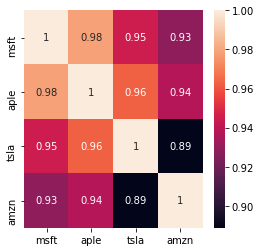

In [38]:
import seaborn as sns
fig, az =plt.subplots(figsize=(4,4))
sns.heatmap(d.corr(),annot=True)
plt.show()

We can see that Microsoft stock price is strongly correlated to Apple and least but enough correlated to Amazon.

# References:

1. Documentation of yfinance.
2. vidyaanalytics.com
3. towardsdatascience.com
4. My own github profile https://github.com/danurag460